<a href="https://colab.research.google.com/github/ibrahim10sy/learn-python/blob/main/ACP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Applications de l'analyse en composantes principales (ACP)**


**Objectifs**

* Utiliser l'analyse en composantes principales (ACP) pour projeter des données 2D sur leurs axes principaux
* Utiliser l'ACP pour réduire la dimensionnalité de l'espace des caractéristiques
* Relier la variance expliquée à l'importance des caractéristiques et à la réduction du bruit

# **Introduction**
Dans ce laboratoire, nous explorerojs la mise en œuvre de deux applications importantes de l'ACP.

* La première application illustre comment utiliser l'ACP pour projeter des données 2D sur leurs axes principaux, c'est-à-dire les deux directions orthogonales qui expliquent la majeure partie de la variance de vos données.

* La seconde application  permettra de projeter des données de plus grande dimension vers un espace de caractéristiques de plus petite dimension. Il s'agit d'un exemple de réduction dimensionnelle, une technique puissante qui présente de nombreux avantages, notamment la réduction de la charge de calcul nécessaire à la construction de votre modèle et, dans de nombreux cas, sa précision. L'ACP peut  aider à filtrer les variables redondantes et linéairement corrélées et à réduire le bruit dans nos données.

# **Utilisation de l'ACP pour projeter des données 2D sur leurs axes principaux**

In [ ]:
!pip install numpy==2.2.0
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

Créer un jeu de données
Création d'un jeu de données bidimensionnel contenant deux entités linéairement corrélées.

Vous utiliserez une distribution normale bivariée.

Les deux entités, X1 et X2, auront une moyenne nulle et une covariance donnée par la matrice de covariance (symétrique) :

Ici, les éléments diagonaux définissent les variances de X1 et X2 (3 et 2, respectivement), tandis que l'élément hors diagonale est la covariance (2) entre X1 et X2, qui exprime la similitude avec laquelle ces caractéristiques varient.

In [2]:
np.random.seed(42)
mean = [0, 0]
cov = [[3, 2], [2, 2]]
X = np.random.multivariate_normal(mean=mean, cov=cov, size=200)

In [3]:
X

array([[-7.79842558e-01, -7.25035362e-01],
       [-1.71097070e+00, -5.64228380e-02],
       [ 4.89591649e-01,  1.85568480e-01],
       [-2.97122622e+00, -1.67515888e+00],
       [ 5.69236811e-01,  9.00239014e-01],
       [ 9.69916161e-01,  3.66038690e-01],
       [ 3.72329343e-01, -1.31659722e+00],
       [ 3.13291389e+00,  1.97374029e+00],
       [ 1.57697817e+00,  1.49525938e+00],
       [ 2.10410746e+00,  4.56393273e-01],
       [-2.37531795e+00, -2.04426174e+00],
       [ 4.66901868e-01, -8.32352558e-01],
       [ 8.71231068e-01,  7.73420205e-01],
       [ 1.78452439e+00,  1.70892989e+00],
       [ 1.12999928e+00,  6.37231499e-01],
       [ 2.58134249e-01,  1.75760187e+00],
       [ 4.53736035e-01, -5.34292484e-01],
       [-8.87208561e-01, -1.71831447e+00],
       [ 4.46952492e-01, -1.29730430e+00],
       [ 2.15569151e+00,  1.84849172e+00],
       [-1.31299097e+00, -8.81189775e-01],
       [ 3.17385058e-01, -5.14359599e-03],
       [ 2.78232697e+00,  1.56765052e+00],
       [ 3.

Visualisez la relation entre les deux fonctionnalités

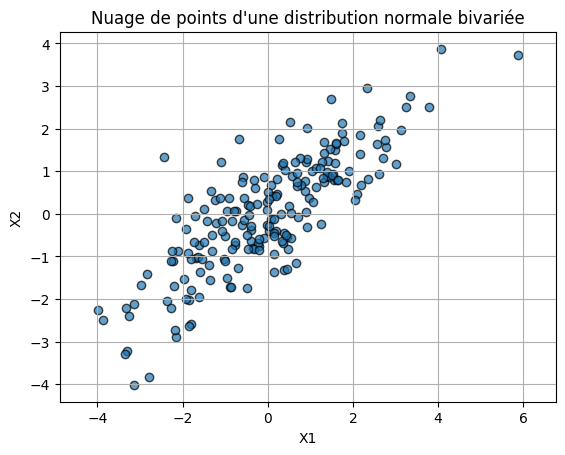

In [5]:
plt.figure()
plt.scatter(X[:,0], X[:,1] ,edgecolor='k', alpha=0.7)
plt.title("Nuage de points d'une distribution normale bivariée")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')
plt.grid(True)
plt.show()

Effectuer une ACP sur l'ensemble de données
Ensuite, vous initialiserez un modèle ACP à deux composants avec des paramètres par défaut, puis vous ajusterez et transformerez l'espace des caractéristiques en une seule étape.

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

Obtenez les composantes principales du modèle.
Les composantes principales sont les axes principaux, représentés en coordonnées spatiales, qui s'alignent sur les directions de variance maximale de vos données.

In [7]:
components = pca.components_
components

array([[ 0.78215821,  0.62307987],
       [-0.62307987,  0.78215821]])

Les composantes principales sont classées par ordre décroissant de leur variance expliquée, qui peut être exprimée sous forme de ratio :

In [8]:
pca.explained_variance_ratio_

array([0.9111946, 0.0888054])

Quel pourcentage de la variance des données est expliqué par la première composante principale ?

Le premier composant explique plus de 90 % de la variance des données, tandis que le second explique environ 9 %.

Visualisations des résultats

In [9]:
projection_pc1 = np.dot(X, components[0])
projection_pc2 = np.dot(X, components[1])

Maintenant que vous disposez de ces coordonnées, vous pouvez les utiliser pour représenter les projections de chaque point de données selon les directions principales de l'espace des caractéristiques d'origine.

In [10]:
x_pc1 = projection_pc1 * components[0][0]
y_pc1 = projection_pc1 * components[0][1]
x_pc2 = projection_pc2 * components[1][0]
y_pc2 = projection_pc2 * components[1][1]

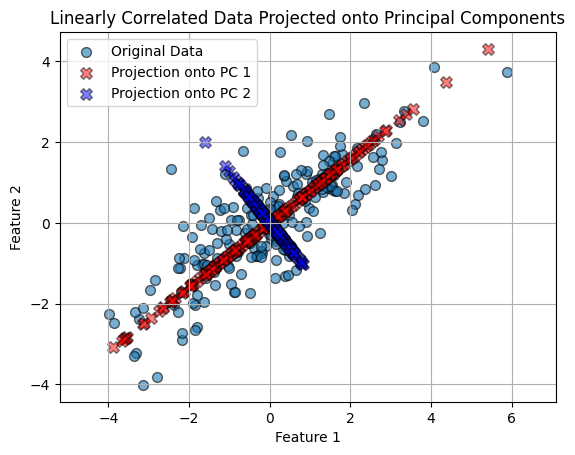

In [11]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], label='Original Data', ec='k', s=50, alpha=0.6)

# Plot the projections along PC1 and PC2
plt.scatter(x_pc1, y_pc1, c='r', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 1')
plt.scatter(x_pc2, y_pc2, c='b', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 2')
plt.title('Linearly Correlated Data Projected onto Principal Components', )
plt.xlabel('Feature 1',)
plt.ylabel('Feature 2',)
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

Les données varient dans deux directions principales.

La première direction, en rouge, correspond à la direction présentant la plus grande variation.

La deuxième direction, en bleu, est perpendiculaire à la première et présente une variance plus faible.

# **PCA pour la réduction de la dimensionnalité de l'espace des caractéristiques**

Pour cette deuxième application, vous utiliserez l'ACP pour projeter l'ensemble de données d'entités Iris quadridimensionnelles sur un espace d'entités bidimensionnel.

Cela vous permettra également de visualiser certaines des structures les plus importantes de l'ensemble de données.

Chargement et prétraitement des données de l'iris

In [12]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
np.unique(iris.target)

array([0, 1, 2])

In [13]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [14]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [16]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Initialiser un modèle PCA et réduire la dimensionnalité de l'ensemble de données Iris à deux composants

In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [19]:
X_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

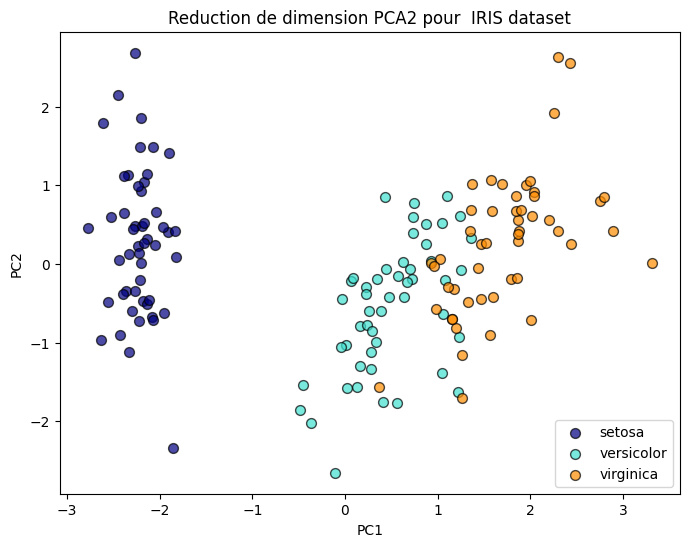

In [26]:
plt.figure(figsize=(8,6))

colors = ['navy', 'turquoise', 'darkorange']
lw = 1

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, s=50, ec='k',alpha=0.7, lw=lw,
                label=target_name)

plt.title('Reduction de dimension PCA2 pour  IRIS dataset',)
plt.xlabel("PC1",)
plt.ylabel("PC2",)
plt.legend(loc='best', shadow=False, scatterpoints=1,)
# plt.grid(True)
plt.show()

Quel pourcentage de la variance de l'espace des caractéristiques d'origine ces deux composantes principales combinées expliquent-elles ?

In [27]:
100*pca.explained_variance_ratio_.sum()

np.float64(95.81320720000166)

Analyse approfondie des variances expliquées
Dans cette dernière série d'exercices, votre objectif est de :

Obtenir et représenter graphiquement les ratios de variance expliquée par ACP pour les quatre caractéristiques d'Iris sous forme de diagramme à barres
Superposer la variance expliquée cumulée

Réinitialiser le modèle PCA sans réduire la dimension

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

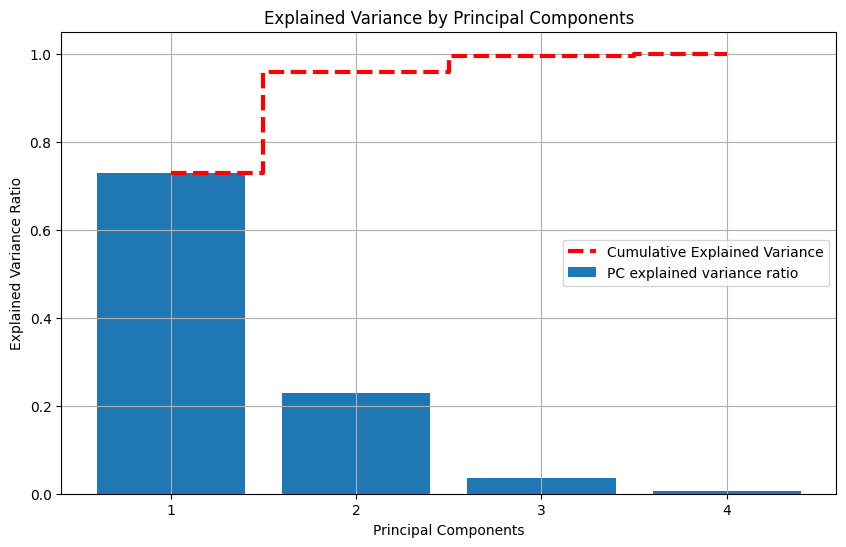

In [29]:
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio for each component
plt.figure(figsize=(10,6))
plt.bar(x=range(1, len(explained_variance_ratio)+1), height=explained_variance_ratio, alpha=1, align='center', label='PC explained variance ratio' )
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Principal Components')

# Plot cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.step(range(1, 5), cumulative_variance, where='mid', linestyle='--', lw=3,color='red', label='Cumulative Explained Variance')
# Only display integer ticks on the x-axis
plt.xticks(range(1, 5))
plt.legend()
plt.grid(True)
plt.show()